# Build a comic book with python

Please note that you only have **one chance** to submit your assignment, please make sure the **zip** file you submit is correct. Zip file should include 
- **your source code ( in the form of a python notebook)**
- **a folder with all your images**
- **both version of comic books in PDF format**

Use the main code blocks for your homework in cartoons-with-python-21.ipynb notebook, as well as some of the pictures. You'll have to make the code blocks work together to write a comic book in PDF format that consists of **three pages of about 20 images each, with text.**
All submissions need to be accompanied by the same story in English. In other words, your submission will consist of two pdf files, one with dialogue in your language, and one with dialogues in English. The pictures need to be the same.
It is recommended to pick one of the themes in the accompanying zip file (miyazaki, monkey king, jungle book, or avengers, family/childrens' book). You may complete them with additional images in the same theme that you download on your own. If you think of a better theme, you may change the theme. Please make sure to approve the theme with the TA's before proceeding.
You need to write your own text. The comic book needs to be in pdf format (not an image). Each pdf will be of 3 pages minimum with 20 images on each page.
It is a team assignment. However, both team members should have different stories. Code of the team can be same, but stories must be different. Both members will be graded individually and need to make individual submissions.
You're going to use an amazing python library for image processing called pillow, PIL in short.
Naming Convention for Assignment 3: **Assignment3_YourFullName_TeamNumber**
eg. the folder you submit should be of the form: **Assignment3_GauriVerma_Team1**

We will celebrate our Oscars the next week after submission(so the TAs and I can judge them):

Best screenplay, best cinematography, best male/animal actor, best female/animal actor, best short story.

## 1.Change to my work path

In [1]:
cd E:\\NEU\\INFO6105 Data Sci Eng Methods\\Assignments\\Assignment-3

E:\NEU\INFO6105 Data Sci Eng Methods\Assignments\Assignment-3


## 2.Show original image

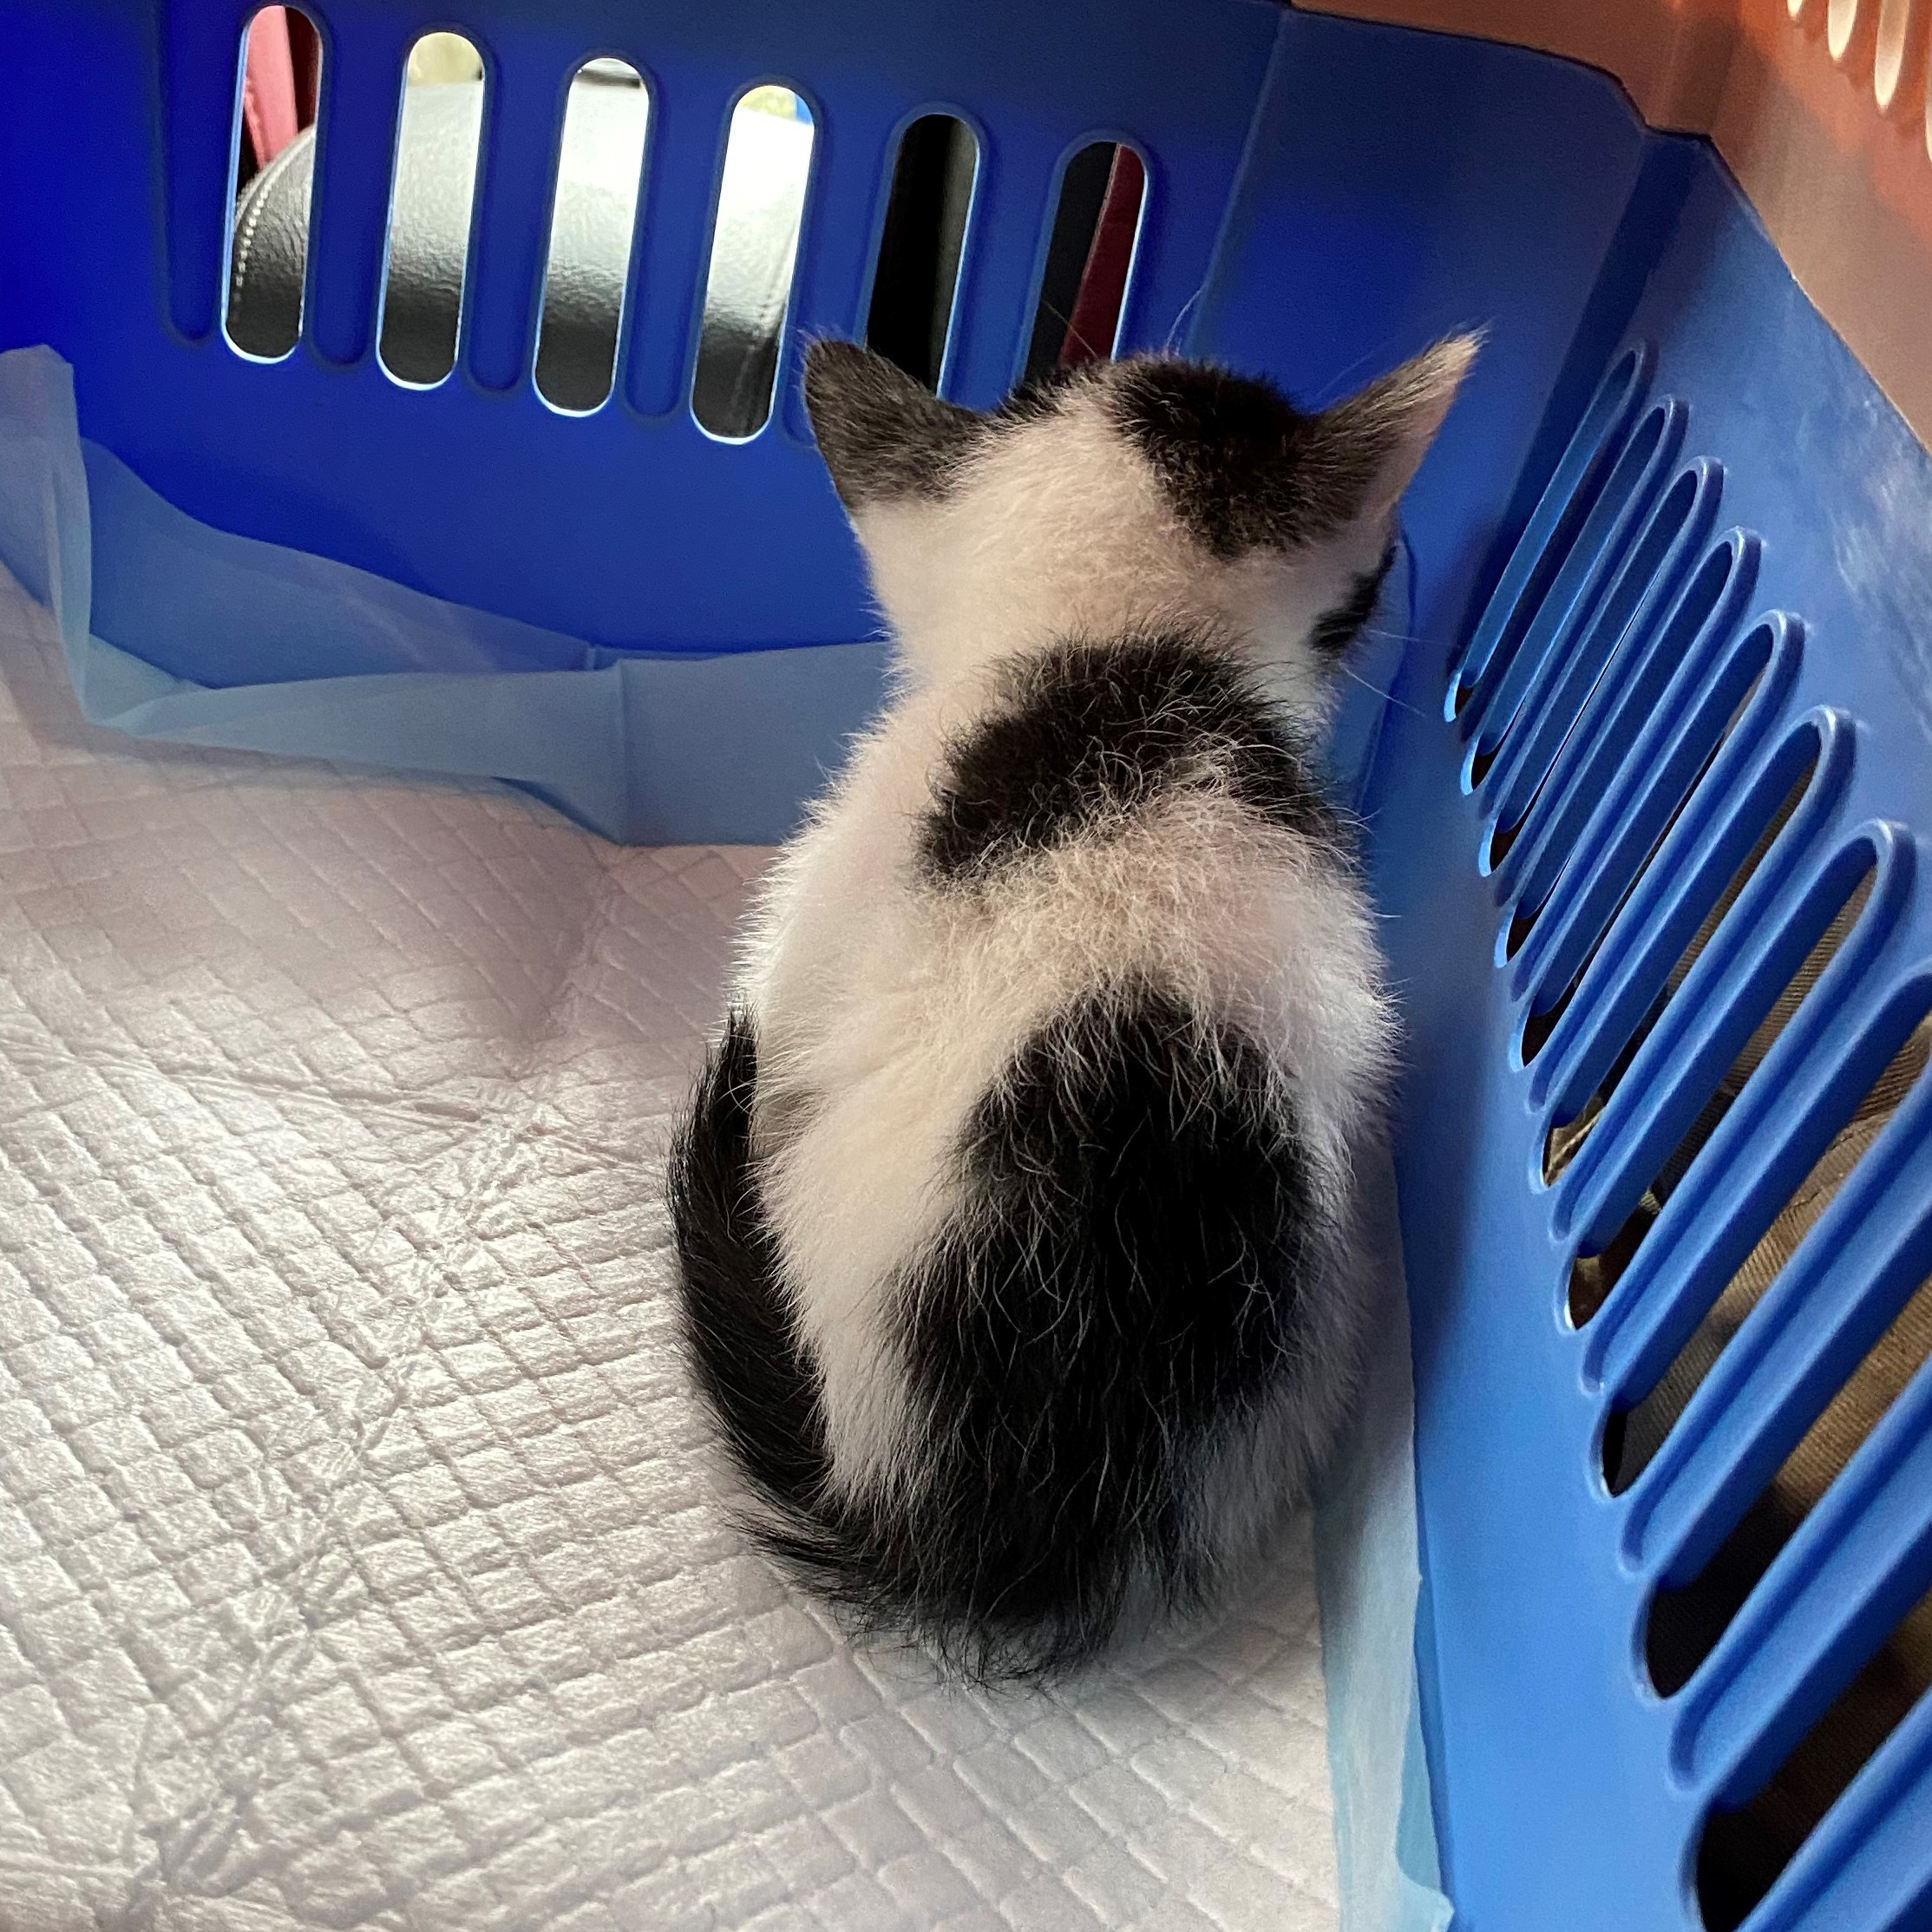

In [2]:
from IPython.display import Image
Image(filename='image/original/1.jpg', width=200)

## 3.Read captions

In [3]:
import pandas as pd
caption = pd.read_csv('dialog/dialog-english.csv')
caption.head(10)

,dialogs
0,This is an abandoned kitten\nHe was only one m...
1,We decided to take him home\nand named him Mai
2,Because he was very weak\nSo we guarded him al...
3,"Good thing he woke up later\n""Little one, you ..."
4,"Seeing Mai eating on his own,\nwe were much re..."
5,He just watched us from afar
6,Little eyes full of big doubts
7,After getting acquainted with\nMai found himse...
8,"Sleeping,of course, \nshould also be here"
9,(Maybe it's his persistence...)


## 4.Add borders and captions to the original images

In [4]:
from PIL import Image, ImageDraw, ImageFont, ImageOps
for i in range(1, 64):
    imgs = Image.open('image/original/%d.jpg' %(i))
    imgs_resize = imgs.resize((400, 400))
    imgs_border = ImageOps.expand(imgs_resize, border=(10,10),fill=(224,224,224))
    
    TINT_COLOR = (0, 0, 0)  
    TRANSPARENCY = .50  
    OPACITY = int(255 * TRANSPARENCY)
    
    imgs_rgba = imgs_border.convert('RGBA')
    overlay = Image.new('RGBA', imgs_rgba.size, TINT_COLOR+(0,))
    draw = ImageDraw.Draw(overlay)
    #arial.ttf  msyh.ttc
    font = ImageFont.truetype('c:/windows/fonts/arial.ttf', 25)
    text = caption.values[i-1][0]
    w, h = font.getsize(text)
    num_lines = len(text.split('\n'))
    x, y = 10, imgs_rgba.height-10-num_lines*h
    draw.rectangle((x, y-10, x + imgs_rgba.width - 21, y + num_lines*h), fill=TINT_COLOR+(OPACITY,))
    draw.text((x, y-10), text, fill=(255, 255, 255), font=font)
    
    imgs_caption = Image.alpha_composite(imgs_rgba, overlay)
    imgs_rgb = imgs_caption.convert("RGB")
    imgs_rgb.save('image/new/english/%d_new.jpg' %(i))

## 5.Show processed new images

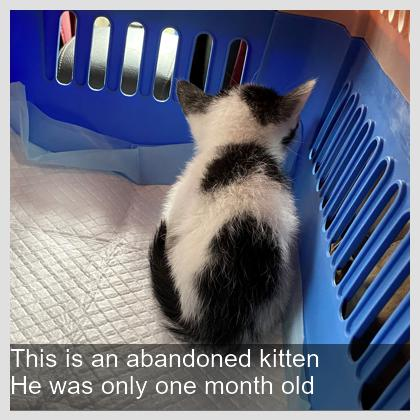

In [5]:
from IPython.display import Image
Image(filename='image/new/english/1_new.jpg', width=200)

## 6.Stitch images horizontally

In [6]:
from PIL import Image
from os.path import isfile, join
from os import listdir
import numpy as np
import PIL

path = 'image/new/english/'
files = [ f for f in listdir(path) if isfile(join(path, f))]
files.sort(key=lambda x:int(x.split('_new.jpg')[0]))
pages = 1
while 0 < len(files):
    lines = 0
    print('page '+str(pages))
    num_cols = old_num_cols = 0
    while lines < 6 and 0 < len(files):
        lines += 1
        while num_cols == old_num_cols:
            num_cols = np.random.randint(3, 5)
        old_num_cols = num_cols
        files_one_line = files[:num_cols]
        print(files_one_line)
        imgs_one_line = [ PIL.Image.open(path+i) for i in files_one_line ]
        min_shape = sorted( [(np.sum(i.size), i.size ) for i in imgs_one_line])[0][1]
        imgs_comb = np.hstack( (np.asarray(i.resize(min_shape)) for i in imgs_one_line ) )
        imgs_comb = PIL.Image.fromarray(imgs_comb)
        imgs_comb.save( 'image/horizontal/english/'+str(pages)+str(lines)+'.jpg' )
        files = files[num_cols:]
    pages+=1

page 1
['1_new.jpg', '2_new.jpg', '3_new.jpg', '4_new.jpg']
['5_new.jpg', '6_new.jpg', '7_new.jpg']
['8_new.jpg', '9_new.jpg', '10_new.jpg', '11_new.jpg']
['12_new.jpg', '13_new.jpg', '14_new.jpg']
['15_new.jpg', '16_new.jpg', '17_new.jpg', '18_new.jpg']
['19_new.jpg', '20_new.jpg', '21_new.jpg']
page 2
['22_new.jpg', '23_new.jpg', '24_new.jpg', '25_new.jpg']


<ipython-input-6-9754bf80fc5d>:24: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  imgs_comb = np.hstack( (np.asarray(i.resize(min_shape)) for i in imgs_one_line ) )


['26_new.jpg', '27_new.jpg', '28_new.jpg']
['29_new.jpg', '30_new.jpg', '31_new.jpg', '32_new.jpg']
['33_new.jpg', '34_new.jpg', '35_new.jpg']
['36_new.jpg', '37_new.jpg', '38_new.jpg', '39_new.jpg']
['40_new.jpg', '41_new.jpg', '42_new.jpg']
page 3
['43_new.jpg', '44_new.jpg', '45_new.jpg']
['46_new.jpg', '47_new.jpg', '48_new.jpg', '49_new.jpg']
['50_new.jpg', '51_new.jpg', '52_new.jpg']
['53_new.jpg', '54_new.jpg', '55_new.jpg', '56_new.jpg']
['57_new.jpg', '58_new.jpg', '59_new.jpg']
['60_new.jpg', '61_new.jpg', '62_new.jpg', '63_new.jpg']


## 7.Show horizontal images

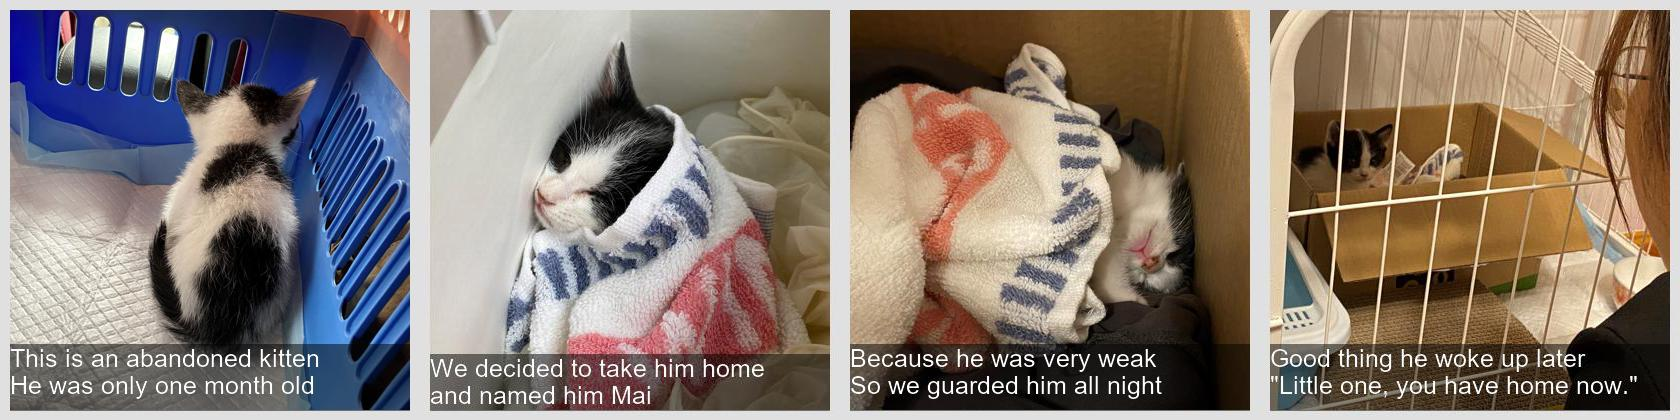

In [7]:
from IPython.display import Image
Image(filename='image/horizontal/english/11.jpg', width=400)

## 8.Stitch images vertically

In [8]:
from PIL import Image
from os.path import isfile, join
from os import listdir
import numpy as np
import PIL

path = 'image/horizontal/english/'
files = [ f for f in listdir(path) if isfile(join(path, f))]
files.sort(key=lambda x:int(x.split('.jpg')[0]))
pages = 1
while 0 < len(files):
    lines = 0
    print('page '+str(pages))
    while lines < 6 and 0 < len(files):
        lines += 6
        files_one_page = files[:lines]
        print(files_one_page)
        imgs_one_page = [ PIL.Image.open(path+i) for i in files_one_page ]
        min_shape = sorted( [(np.sum(i.size), i.size ) for i in imgs_one_page])[0][1]
        imgs_comb = np.vstack( (np.asarray(i.resize(min_shape)) for i in imgs_one_page ) )
        imgs_comb = PIL.Image.fromarray(imgs_comb)
        imgs_comb.save( 'image/vertical/english/'+str(pages)+'.jpg' )
        files = files[lines:]
    pages+=1

page 1
['11.jpg', '12.jpg', '13.jpg', '14.jpg', '15.jpg', '16.jpg']
page 2
['21.jpg', '22.jpg', '23.jpg', '24.jpg', '25.jpg', '26.jpg']


<ipython-input-8-5ac188313f08>:20: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  imgs_comb = np.vstack( (np.asarray(i.resize(min_shape)) for i in imgs_one_page ) )


page 3
['31.jpg', '32.jpg', '33.jpg', '34.jpg', '35.jpg', '36.jpg']


## 9.Show vertical images

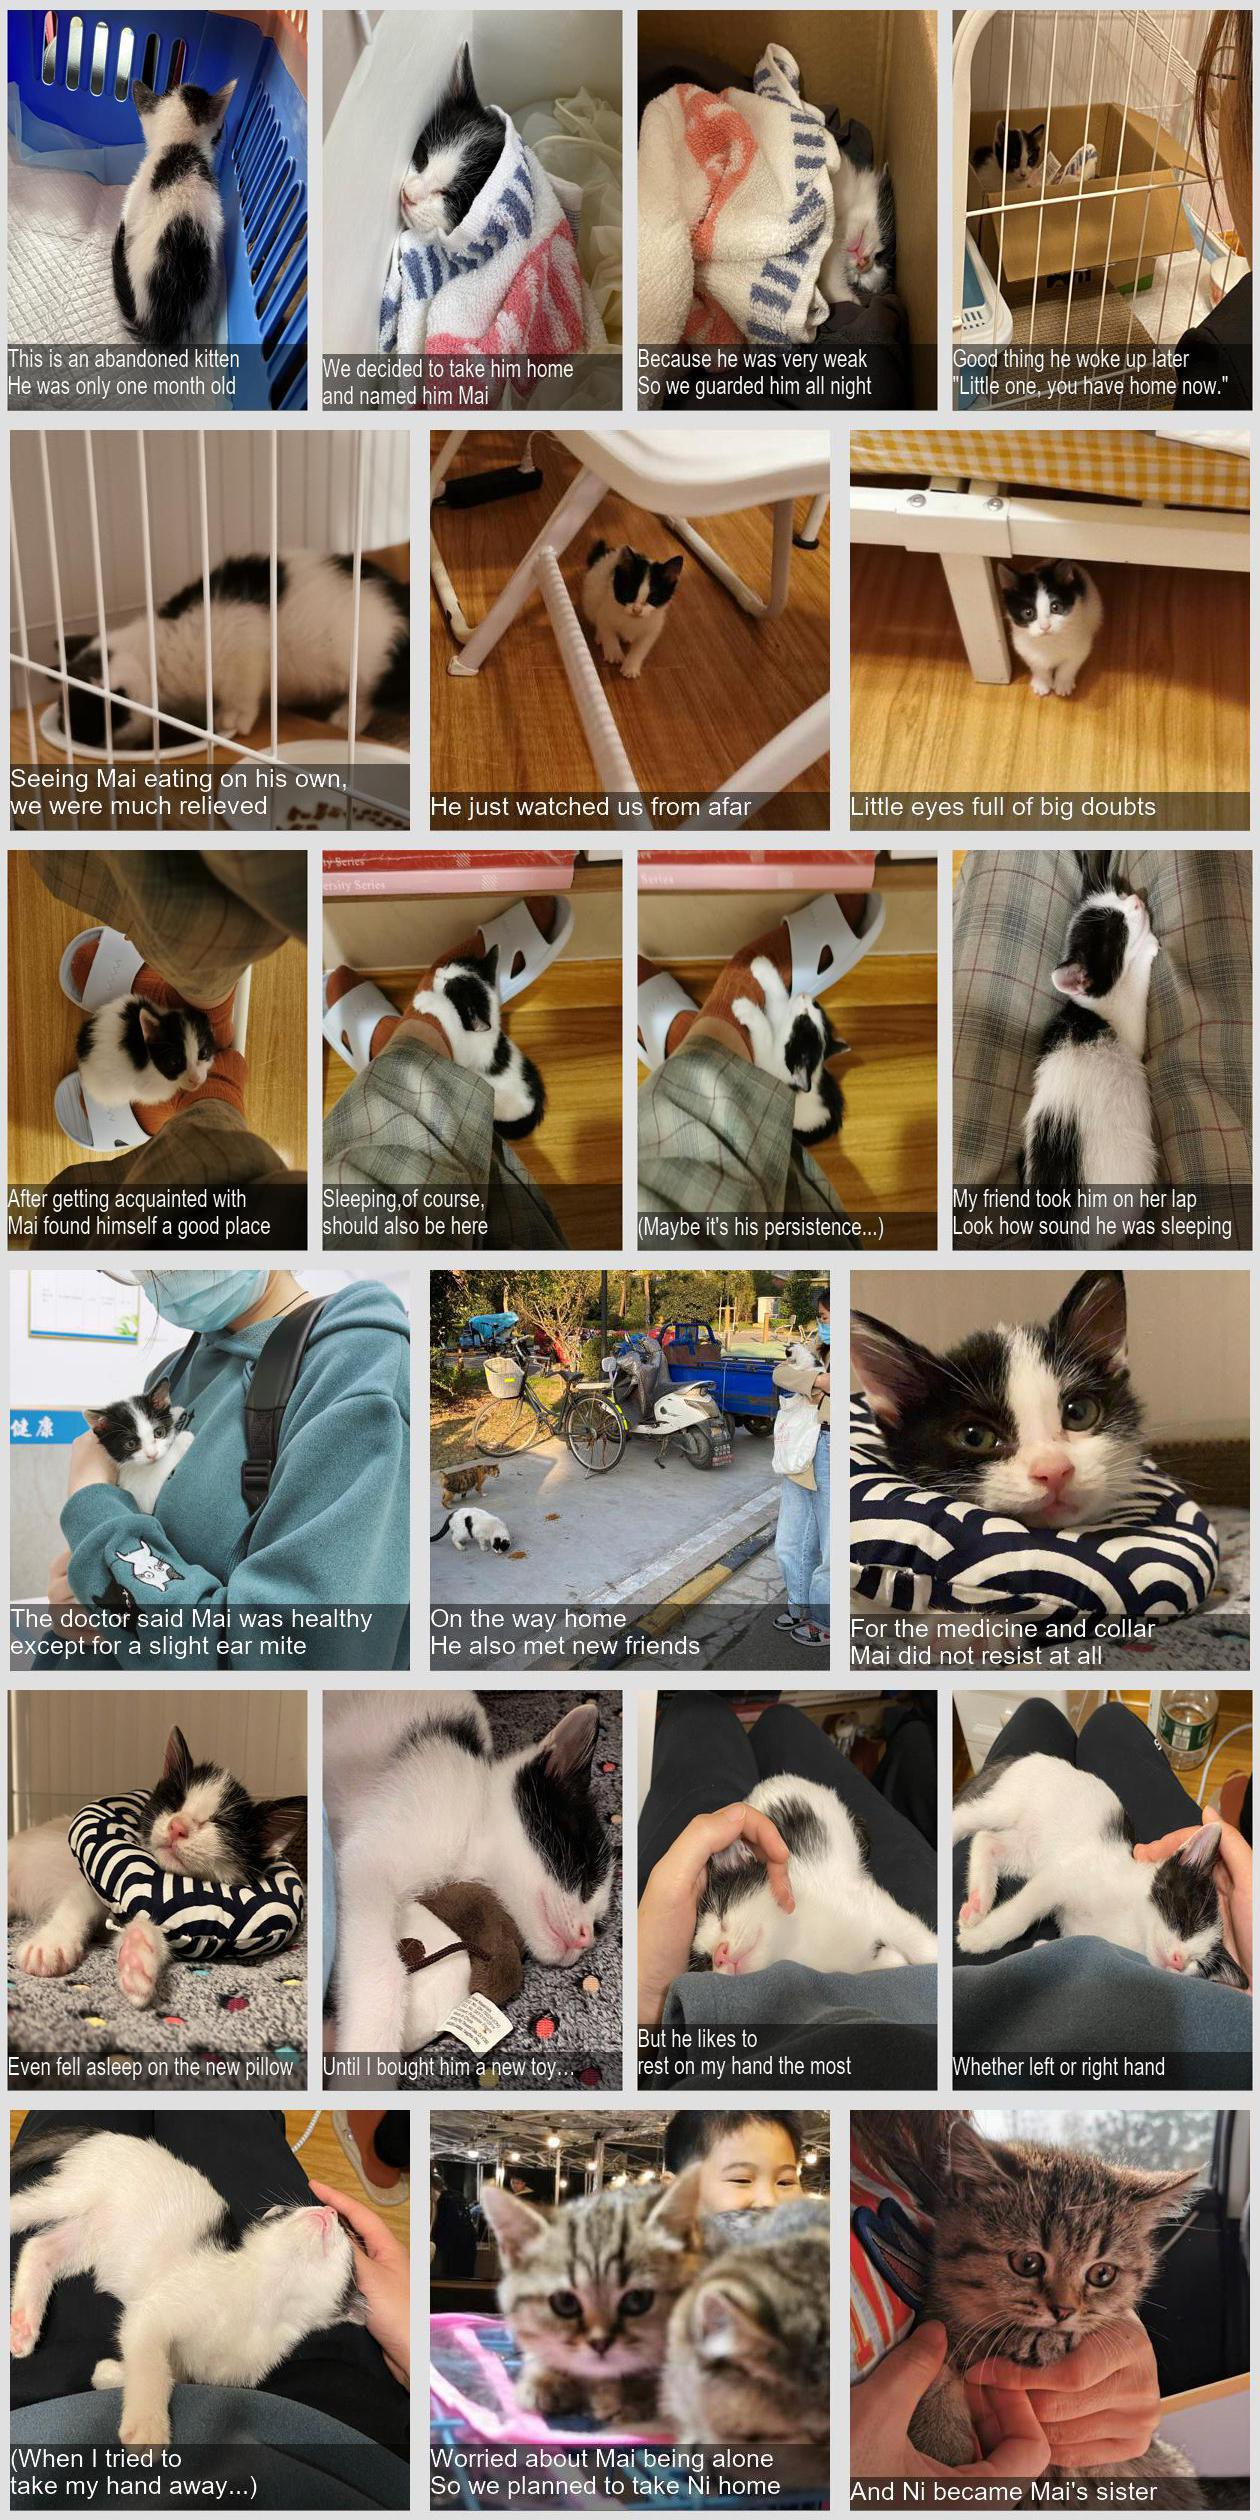

In [9]:
from IPython.display import Image
Image(filename='image/vertical/english/1.jpg', width=400)

## 10.Generate pdf

In [10]:
from PIL import Image
from fpdf import FPDF
from os.path import isfile, join
from os import listdir
import numpy as np
import PIL

path = 'image/vertical/english/'
files = [ f for f in listdir(path) if isfile(join(path, f))]
files.sort(key=lambda x:int(x.split('.jpg')[0]))
print(files)
imgslist = [ path+i for i in files ]

cover = Image.open('image/vertical/english/0.jpg')
width, height = cover.size

pdf = FPDF(unit = "pt", format = [width,height]) 

for img in imgslist:
    pdf.add_page()
    pdf.image(img, 0, 0, width, height)
pdf.output('pdf/Mai and Ni-english.pdf','F')

['0.jpg', '1.jpg', '2.jpg', '3.jpg']


''